In [42]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [64]:
data = pd.read_csv("Desktop/Career_Stats_Fumbles.csv")
meas = pd.read_csv("Desktop/NFL_Hand_Size.csv")

In [66]:
data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks
0,joeadams/2532782,Joe Adams,NaN,2012,Carolina Panthers,9,4,3,--,1,--,0,--,--,0,0,0
1,clarenceverdin/2503464,Clarence Verdin,NaN,1994,Atlanta Falcons,12,3,1,--,2,--,0,--,--,0,0,0
2,clarenceverdin/2503464,Clarence Verdin,NaN,1993,Indianapolis Colts,16,3,2,--,1,--,0,--,--,0,0,0
3,clarenceverdin/2503464,Clarence Verdin,NaN,1992,Indianapolis Colts,16,2,1,--,--,--,--,--,--,0,0,0
4,clarenceverdin/2503464,Clarence Verdin,NaN,1991,Indianapolis Colts,16,2,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,torreysmith/2495459,Torrey Smith,WR,2015,San Francisco 49ers,16,--,--,0,--,--,--,--,--,--,--,--
11285,torreysmith/2495459,Torrey Smith,WR,2014,Baltimore Ravens,16,--,--,0,--,--,--,--,--,--,--,--
11286,torreysmith/2495459,Torrey Smith,WR,2013,Baltimore Ravens,16,1,0,0,1,--,0,--,--,0,0,0
11287,torreysmith/2495459,Torrey Smith,WR,2012,Baltimore Ravens,16,--,--,0,--,--,--,--,--,--,--,--


In [67]:
meas

,Player,Hand
0,A.J. Brown,9.75
1,A.J. McCarron,10.00
2,Aaron Burbridge,8.25
3,Aaron Corp,9.38
4,Aaron Dobson,9.08
...,...,...
667,Zach Line,8.68
668,Zach Mettenberger,9.75
669,Zach Pascal,10.00
670,Zach Zenner,9.63


In [68]:
meas["same_name"] = meas.Player.isin(data.Name) 
meas["InData"] = np.where((meas["same_name"] == True),1,0) # If both instances are True.
meas = meas.drop(["same_name"],axis=1)

meas

,Player,Hand,InData
0,A.J. Brown,9.75,0
1,A.J. McCarron,10.00,0
2,Aaron Burbridge,8.25,1
3,Aaron Corp,9.38,0
4,Aaron Dobson,9.08,1
...,...,...,...
667,Zach Line,8.68,0
668,Zach Mettenberger,9.75,0
669,Zach Pascal,10.00,0
670,Zach Zenner,9.63,1


In [69]:
# Get indexes where name column doesn't have value john
indexNames = meas[meas['InData'] == 0].index 
# Delete these row indexes from dataFrame
meas.drop(indexNames , inplace=True)

In [70]:
meas

,Player,Hand,InData
2,Aaron Burbridge,8.25,1
4,Aaron Dobson,9.08,1
8,Aaron Rodgers,9.38,1
9,Ace Sanders,8.78,1
16,Alex Collins,9.25,1
...,...,...,...
658,Walt Powell,9.50,1
660,Wendell Smallwood,9.25,1
661,Will Fuller,8.25,1
663,Willie Snead,10.25,1


In [71]:
data["same_name"] = data.Name.isin(meas.Player)
data["InData"] = np.where((data["same_name"] == True),1,0) # If both instances are True.
data = data.drop(["same_name"],axis=1)

data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData
0,joeadams/2532782,Joe Adams,NaN,2012,Carolina Panthers,9,4,3,--,1,--,0,--,--,0,0,0,0
1,clarenceverdin/2503464,Clarence Verdin,NaN,1994,Atlanta Falcons,12,3,1,--,2,--,0,--,--,0,0,0,0
2,clarenceverdin/2503464,Clarence Verdin,NaN,1993,Indianapolis Colts,16,3,2,--,1,--,0,--,--,0,0,0,0
3,clarenceverdin/2503464,Clarence Verdin,NaN,1992,Indianapolis Colts,16,2,1,--,--,--,--,--,--,0,0,0,0
4,clarenceverdin/2503464,Clarence Verdin,NaN,1991,Indianapolis Colts,16,2,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,torreysmith/2495459,Torrey Smith,WR,2015,San Francisco 49ers,16,--,--,0,--,--,--,--,--,--,--,--,0
11285,torreysmith/2495459,Torrey Smith,WR,2014,Baltimore Ravens,16,--,--,0,--,--,--,--,--,--,--,--,0
11286,torreysmith/2495459,Torrey Smith,WR,2013,Baltimore Ravens,16,1,0,0,1,--,0,--,--,0,0,0,0
11287,torreysmith/2495459,Torrey Smith,WR,2012,Baltimore Ravens,16,--,--,0,--,--,--,--,--,--,--,--,0


In [72]:
# Get indexes where name column doesn't have value john
indexNames = data[data['InData'] == 0].index 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData
27,tomsavage/2543640,Tom Savage,QB,2016,Houston Texans,3,1,1,--,--,--,--,--,--,0,0,0,1
28,tomsavage/2543640,Tom Savage,QB,2014,Houston Texans,2,2,1,--,1,--,0,--,--,0,0,0,1
109,kenyandrake/2555230,Kenyan Drake,RB,2016,Miami Dolphins,16,1,0,0,--,--,--,--,--,0,0,0,1
168,t.j.jones/2543836,T.J. Jones,WR,2016,Detroit Lions,3,--,--,--,--,--,--,--,--,--,--,--,1
169,t.j.jones/2543836,T.J. Jones,WR,2015,Detroit Lions,10,2,1,0,1,--,0,--,--,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,brockosweiler/2533436,Brock Osweiler,QB,2016,Houston Texans,15,5,1,--,2,--,0,--,--,0,0,0,1
11265,brockosweiler/2533436,Brock Osweiler,QB,2015,Denver Broncos,8,4,1,--,2,--,0,--,--,0,0,0,1
11266,brockosweiler/2533436,Brock Osweiler,QB,2014,Denver Broncos,4,--,--,--,--,--,--,--,--,--,--,--,1
11267,brockosweiler/2533436,Brock Osweiler,QB,2013,Denver Broncos,4,--,--,--,--,--,--,--,--,--,--,--,1


In [76]:
data["Fumbles"] = data['Fumbles'].astype(str)

In [77]:
data.loc[data['Fumbles'] == "--"] = 0

In [78]:
data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData
27,tomsavage/2543640,Tom Savage,QB,2016,Houston Texans,3,1,1,--,--,--,--,--,--,0,0,0,1
28,tomsavage/2543640,Tom Savage,QB,2014,Houston Texans,2,2,1,--,1,--,0,--,--,0,0,0,1
109,kenyandrake/2555230,Kenyan Drake,RB,2016,Miami Dolphins,16,1,0,0,--,--,--,--,--,0,0,0,1
168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
169,t.j.jones/2543836,T.J. Jones,WR,2015,Detroit Lions,10,2,1,0,1,--,0,--,--,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,brockosweiler/2533436,Brock Osweiler,QB,2016,Houston Texans,15,5,1,--,2,--,0,--,--,0,0,0,1
11265,brockosweiler/2533436,Brock Osweiler,QB,2015,Denver Broncos,8,4,1,--,2,--,0,--,--,0,0,0,1
11266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
data["Fumbles"] = data['Fumbles'].astype(int)
data["Fumbles P/G"] = data['Fumbles'] / data["Games Played"]

In [80]:
data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData,Fumbles P/G
27,tomsavage/2543640,Tom Savage,QB,2016,Houston Texans,3,1,1,--,--,--,--,--,--,0,0,0,1,0.333333
28,tomsavage/2543640,Tom Savage,QB,2014,Houston Texans,2,2,1,--,1,--,0,--,--,0,0,0,1,1.000000
109,kenyandrake/2555230,Kenyan Drake,RB,2016,Miami Dolphins,16,1,0,0,--,--,--,--,--,0,0,0,1,0.062500
168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
169,t.j.jones/2543836,T.J. Jones,WR,2015,Detroit Lions,10,2,1,0,1,--,0,--,--,0,0,0,1,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,brockosweiler/2533436,Brock Osweiler,QB,2016,Houston Texans,15,5,1,--,2,--,0,--,--,0,0,0,1,0.333333
11265,brockosweiler/2533436,Brock Osweiler,QB,2015,Denver Broncos,8,4,1,--,2,--,0,--,--,0,0,0,1,0.500000
11266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
11267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [111]:
# Get indexes where name column doesn't have value john
indexNames = data[data['InData'] == 0].index 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData,Fumbles P/G
27,tomsavage/2543640,Tom Savage,QB,2016,Houston Texans,3,1,1,--,--,--,--,--,--,0,0,0,1,0.333333
28,tomsavage/2543640,Tom Savage,QB,2014,Houston Texans,2,2,1,--,1,--,0,--,--,0,0,0,1,1.000000
109,kenyandrake/2555230,Kenyan Drake,RB,2016,Miami Dolphins,16,1,0,0,--,--,--,--,--,0,0,0,1,0.062500
169,t.j.jones/2543836,T.J. Jones,WR,2015,Detroit Lions,10,2,1,0,1,--,0,--,--,0,0,0,1,0.200000
202,amaricooper/2552487,Amari Cooper,WR,2016,Oakland Raiders,16,2,0,0,--,--,--,--,--,1,0,0,1,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11241,aaronrodgers/2506363,Aaron Rodgers,QB,2008,Green Bay Packers,16,10,3,0,5,--,0,--,--,0,0,0,1,0.625000
11243,aaronrodgers/2506363,Aaron Rodgers,QB,2006,Green Bay Packers,2,1,1,--,--,--,--,--,--,0,0,0,1,0.500000
11244,aaronrodgers/2506363,Aaron Rodgers,QB,2005,Green Bay Packers,3,2,2,--,--,--,--,--,--,0,0,0,1,0.666667
11264,brockosweiler/2533436,Brock Osweiler,QB,2016,Houston Texans,15,5,1,--,2,--,0,--,--,0,0,0,1,0.333333


In [123]:
df = data.groupby('Name')["Fumbles P/G"].mean().to_frame(name = 'df').reset_index()

In [124]:
df

,Name,df
0,Aaron Burbridge,0.062500
1,Aaron Dobson,0.083333
2,Aaron Rodgers,0.484722
3,Ace Sanders,0.166667
4,Alex Collins,0.181818
...,...,...
165,Walt Powell,0.250000
166,Wendell Smallwood,0.076923
167,Will Fuller,0.142857
168,Willie Snead,0.133333


In [125]:
meas["same_name"] = meas.Player.isin(df.Name) 
meas["InData"] = np.where((meas["same_name"] == True),1,0) # If both instances are True.
meas = meas.drop(["same_name"],axis=1)

meas

,Player,Hand,InData
2,Aaron Burbridge,8.25,1
4,Aaron Dobson,9.08,1
8,Aaron Rodgers,9.38,1
9,Ace Sanders,8.78,1
16,Alex Collins,9.25,1
...,...,...,...
658,Walt Powell,9.50,1
660,Wendell Smallwood,9.25,1
661,Will Fuller,8.25,1
663,Willie Snead,10.25,1


In [130]:
# Get indexes where name column doesn't have value john
indexNames = data[data['InData'] == 0].index 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

data

,Player Id,Name,Position,Year,Team,Games Played,Fumbles,Fumbles Lost,Forced Fumbles,Own Fumbles Recovered,Opponent Fumbles Recovered,Own Fumble Return Yards,Opponent Fumble Return Yards,Fumble Return TDs,Out of Bounds Fumbles,Saftey Fumbles,Touchbacks,InData,Fumbles P/G
27,tomsavage/2543640,Tom Savage,QB,2016,Houston Texans,3,1,1,--,--,--,--,--,--,0,0,0,1,0.333333
28,tomsavage/2543640,Tom Savage,QB,2014,Houston Texans,2,2,1,--,1,--,0,--,--,0,0,0,1,1.000000
109,kenyandrake/2555230,Kenyan Drake,RB,2016,Miami Dolphins,16,1,0,0,--,--,--,--,--,0,0,0,1,0.062500
169,t.j.jones/2543836,T.J. Jones,WR,2015,Detroit Lions,10,2,1,0,1,--,0,--,--,0,0,0,1,0.200000
202,amaricooper/2552487,Amari Cooper,WR,2016,Oakland Raiders,16,2,0,0,--,--,--,--,--,1,0,0,1,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11241,aaronrodgers/2506363,Aaron Rodgers,QB,2008,Green Bay Packers,16,10,3,0,5,--,0,--,--,0,0,0,1,0.625000
11243,aaronrodgers/2506363,Aaron Rodgers,QB,2006,Green Bay Packers,2,1,1,--,--,--,--,--,--,0,0,0,1,0.500000
11244,aaronrodgers/2506363,Aaron Rodgers,QB,2005,Green Bay Packers,3,2,2,--,--,--,--,--,--,0,0,0,1,0.666667
11264,brockosweiler/2533436,Brock Osweiler,QB,2016,Houston Texans,15,5,1,--,2,--,0,--,--,0,0,0,1,0.333333


In [136]:
# Get indexes where name column doesn't have value john
indexNames = meas[meas['Player'] == "Mike Davis"].index 
# Delete these row indexes from dataFrame
meas.drop(indexNames , inplace=True)

meas

,Player,Hand,InData
2,Aaron Burbridge,8.25,1
4,Aaron Dobson,9.08,1
8,Aaron Rodgers,9.38,1
9,Ace Sanders,8.78,1
16,Alex Collins,9.25,1
...,...,...,...
658,Walt Powell,9.50,1
660,Wendell Smallwood,9.25,1
661,Will Fuller,8.25,1
663,Willie Snead,10.25,1


In [139]:
# Get indexes where name column doesn't have value john
indexNames = df[df['Name'] == "Mike Davis"].index 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df

,Name,df
0,Aaron Burbridge,0.062500
1,Aaron Dobson,0.083333
2,Aaron Rodgers,0.484722
3,Ace Sanders,0.166667
4,Alex Collins,0.181818
...,...,...
165,Walt Powell,0.250000
166,Wendell Smallwood,0.076923
167,Will Fuller,0.142857
168,Willie Snead,0.133333


In [141]:
X = meas['Hand'].values.reshape(-1,1)
y = df['df'].values.reshape(-1,1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [144]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.55563099]
[[0.08888816]]


In [145]:
y_pred = regressor.predict(X_test)

In [146]:
pdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pdf

,Actual,Predicted
0,0.163462,0.211474
1,0.527778,0.255918
2,0.435897,0.295918
3,0.108333,0.300362
4,0.112500,0.260362
5,0.208333,0.300362
6,0.112121,0.266585
7,0.511657,0.278140
8,0.066667,0.199918
9,0.062500,0.304806


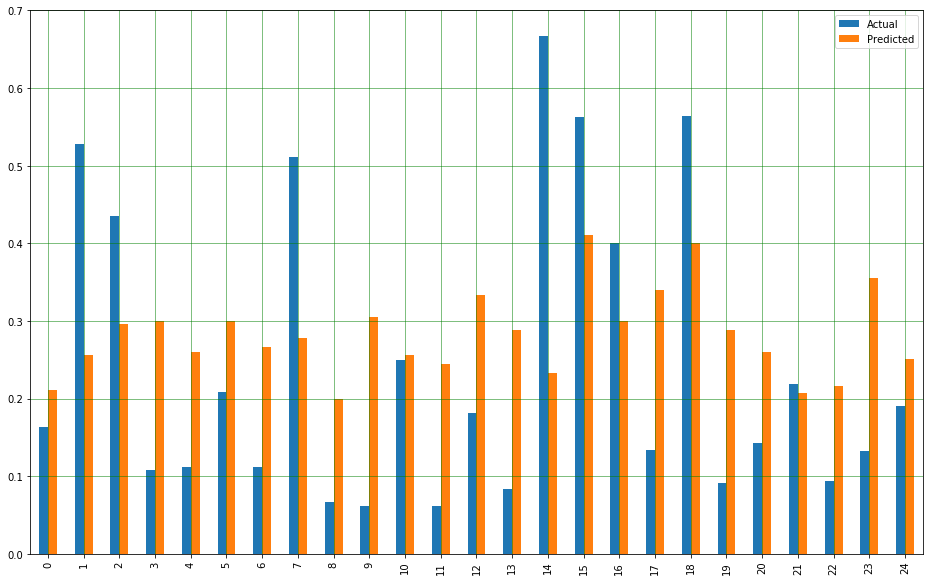

In [148]:
df1 = pdf.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

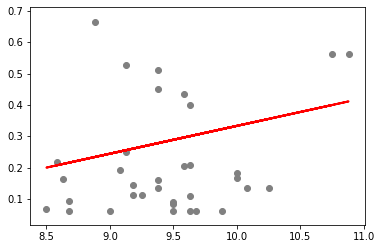

In [149]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16344574757080488
Mean Squared Error: 0.03314235001300864
Root Mean Squared Error: 0.18205040514376405
